In [126]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
import numpy as np
import pandas as pd                  
from sklearn.metrics import mean_absolute_error
import warnings
import matplotlib.pyplot as plt

!pip install pmdarima
from pmdarima import auto_arima  

**Read Data**

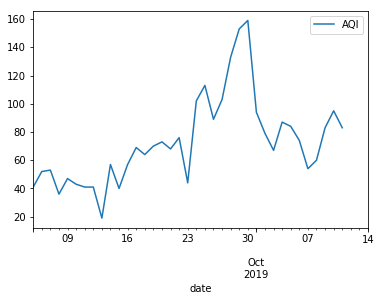

In [202]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/AQI/AQI.csv",delimiter='\t', header = None, encoding='iso-8859-1', names = ['date','AQI'])
df.date = pd.to_datetime(df.date)
df = df.set_index("date")
df.plot()

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40 entries, 2019-09-05 to 2019-10-14
Data columns (total 1 columns):
AQI    37 non-null float64
dtypes: float64(1)
memory usage: 640.0 bytes


In [135]:
df.head()

,AQI
date,
2019-09-05,41.0
2019-09-06,52.0
2019-09-07,53.0
2019-09-08,36.0
2019-09-09,47.0


**Using auto_arima to obtain optimal hyperparameters**

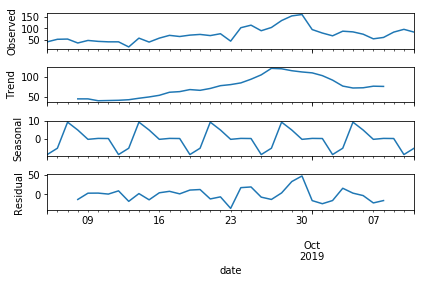

In [161]:
from statsmodels.tsa.seasonal import seasonal_decompose 
a = seasonal_decompose(df["AQI"][:37], model = "add")
a.plot();

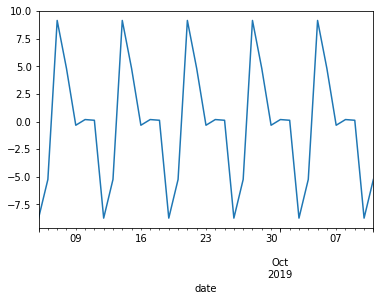

In [162]:
a.seasonal.plot();

In [164]:
auto_arima(df.iloc[:37,:], seasonal=True, m=12, max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_auto_solvers.py:211: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(1, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_auto_solvers.py:211: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   37
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -158.977
Date:                Fri, 11 Oct 2019   AIC                            325.954
Time:                        13:12:30   BIC                            332.289
Sample:                             0   HQIC                           328.165
                                 - 37                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4520      0.389      1.162      0.245      -0.311       1.215
ar.L1          0.6956      0.265      2.630      0.009       0.177       1.214
ma.L1         -0.9999     87.690     -0.011      0.991    -172.869     170.869
sigma2       379.3670   3.32e+04      0.011      0.991   -6.47e+04    6.55e+04
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 0.19
Prob(Q):                               nan   Prob(JB):                         0.91
Heteroskedasticity (H):               1.96   Skew:                             0.16
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [234]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
train = df.iloc[:30]
test = df.iloc[30:37]
test2 = df.iloc[30:]

arima_model = SARIMAX(train['AQI'], order = (1,1,1))
arima_result = arima_model.fit()
arima_result.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                    AQI   No. Observations:                   30
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -130.626
Date:                Fri, 11 Oct 2019   AIC                            267.253
Time:                        14:23:52   BIC                            271.355
Sample:                    09-05-2019   HQIC                           268.537
                         - 10-04-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5692      0.368      1.547      0.122      -0.152       1.291
ma.L1         -0.8004      0.234     -3.423      0.001      -1.259      -0.342
sigma2       475.3152    140.640      3.380      0.001     199.665     750.965
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 0.45
Prob(Q):                               nan   Prob(JB):                         0.80
Heteroskedasticity (H):               3.33   Skew:                            -0.21
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [207]:
arima_pred = arima_result.predict(start = len(train), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

2019-10-05    89.476485
2019-10-06    90.886141
2019-10-07    91.688540
2019-10-08    92.145279
2019-10-09    92.405262
2019-10-10    92.553249
2019-10-11    92.637485
2019-10-12    92.685434
2019-10-13    92.712727
2019-10-14    92.728263
Freq: D, Name: ARIMA Predictions, dtype: float64

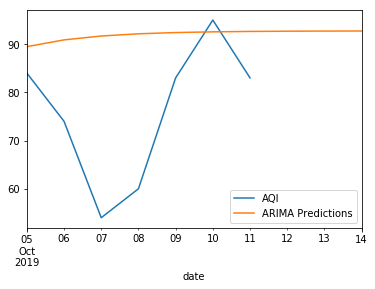

In [208]:
test['AQI'].plot( legend=True)
arima_pred.plot(legend = True)

In [209]:
arima_mae_error = mean_absolute_error(test['AQI'], arima_pred[:7])

mean_value = df['AQI'].mean()

print(f'MAE Error: {arima_mae_error}\nMean: {mean_value}')

MAE Error: 16.240849264013494
Mean: 73.05405405405405


**Using LSTM**

In [0]:
import numpy as np
import pandas as pd                  
from sklearn.metrics import mean_absolute_error
from keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt

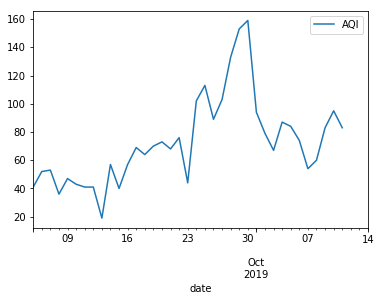

In [371]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/AQI/AQI.csv",delimiter='\t', header = None, encoding='iso-8859-1', names = ['date','AQI'])
df.date = pd.to_datetime(df.date)
df = df.set_index("date")
df.plot()

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40 entries, 2019-09-05 to 2019-10-14
Data columns (total 1 columns):
AQI    37 non-null float64
dtypes: float64(1)
memory usage: 640.0 bytes


In [373]:
df.tail()

,AQI
date,
2019-10-10,95.0
2019-10-11,83.0
2019-10-12,NaN
2019-10-13,NaN
2019-10-14,NaN


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train_data = scaler.transform(train)
scaled_test_data = scaler.transform(test)
scaled_test2_data = scaler.transform(test2)

Define LSTM model

In [378]:
n_input = 3
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(10, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(3))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 10)                480       
_________________________________________________________________
dense_44 (Dense)             (None, 3)                 33        
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 4         
Total params: 517
Trainable params: 517
Non-trainable params: 0
_________________________________________________________________


Train

In [360]:
lstm_model.fit_generator(generator,epochs=30)

Epoch 1/30
27/27 [==============================] - 5s 194ms/step - loss: 0.1745
Epoch 2/30
27/27 [==============================] - 0s 14ms/step - loss: 0.1212
Epoch 3/30
27/27 [==============================] - 0s 15ms/step - loss: 0.0768
Epoch 4/30
27/27 [==============================] - 0s 16ms/step - loss: 0.0561
Epoch 5/30
27/27 [==============================] - 0s 14ms/step - loss: 0.0443
Epoch 6/30
27/27 [==============================] - 0s 14ms/step - loss: 0.0416
Epoch 7/30
27/27 [==============================] - 0s 15ms/step - loss: 0.0412
Epoch 8/30
27/27 [==============================] - 0s 14ms/step - loss: 0.0404
Epoch 9/30
27/27 [==============================] - 0s 14ms/step - loss: 0.0393
Epoch 10/30
27/27 [==============================] - 0s 14ms/step - loss: 0.0389
Epoch 11/30
27/27 [==============================] - 0s 14ms/step - loss: 0.0384
Epoch 12/30
27/27 [==============================] - 0s 14ms/step - loss: 0.0379
Epoch 13/30
27/27 [=================

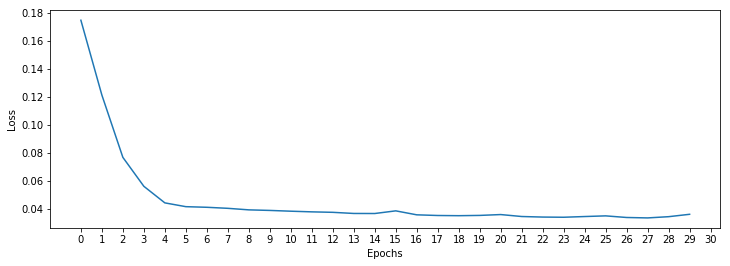

In [361]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,31,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [0]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test2)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [363]:
lstm_predictions_scaled

[array([0.43866122], dtype=float32),
 array([0.44048023], dtype=float32),
 array([0.4595428], dtype=float32),
 array([0.45474237], dtype=float32),
 array([0.45794562], dtype=float32),
 array([0.46146896], dtype=float32),
 array([0.4619457], dtype=float32),
 array([0.46341512], dtype=float32),
 array([0.46454325], dtype=float32),
 array([0.46519086], dtype=float32)]

In [364]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

array([[80.41257048],
       [80.66723251],
       [83.33599353],
       [82.66393209],
       [83.11238611],
       [83.60565507],
       [83.67239976],
       [83.87811625],
       [84.03605545],
       [84.12672007]])

In [365]:
test2['LSTM_Predictions'] = lstm_predictions
test2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,AQI,LSTM_Predictions
date,,
2019-10-05,84.0,80.412570
2019-10-06,74.0,80.667233
2019-10-07,54.0,83.335994
2019-10-08,60.0,82.663932
2019-10-09,83.0,83.112386
2019-10-10,95.0,83.605655
2019-10-11,83.0,83.672400
2019-10-12,NaN,83.878116
2019-10-13,NaN,84.036055


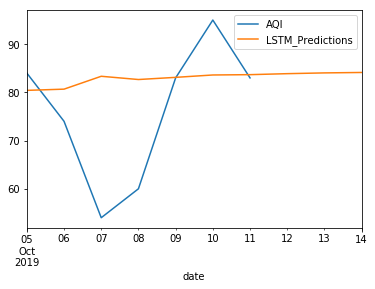

In [366]:
test2['AQI'].plot(legend=True)
test2['LSTM_Predictions'].plot(legend = True);

In [367]:
test2[:]

,AQI,LSTM_Predictions
date,,
2019-10-05,84.0,80.412570
2019-10-06,74.0,80.667233
2019-10-07,54.0,83.335994
2019-10-08,60.0,82.663932
2019-10-09,83.0,83.112386
2019-10-10,95.0,83.605655
2019-10-11,83.0,83.672400
2019-10-12,NaN,83.878116
2019-10-13,NaN,84.036055


In [368]:
lstm_mae_error = mean_absolute_error(test2['AQI'][:-3], test2['LSTM_Predictions'][:-3])

mean_value = df['AQI'].mean()

print(f'MAE Error: {lstm_mae_error}\nMean: {mean_value}')

MAE Error: 10.633388348988124
Mean: 73.05405405405405
